In [84]:
import sklearn

print(sklearn.__version__)

1.0.2


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('../iris.csv')
iris.drop('id', axis=1, inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [86]:
"""
To better understand each attribute, start with univariate plots, that is, plots of each individual variable

Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges. 
There are more univariate summary plots including density plots and boxplots.

This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution .
"""

'\nTo better understand each attribute, start with univariate plots, that is, plots of each individual variable\n\nHistograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges. \nThere are more univariate summary plots including density plots and boxplots.\n\nThis gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution .\n'

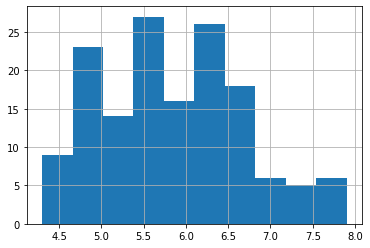

In [87]:
iris['sepal_len'].hist();

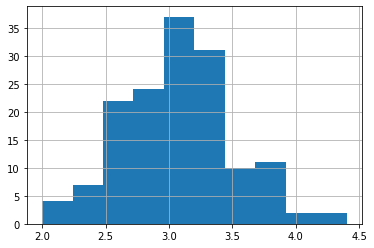

In [88]:
iris['sepal_wd'].hist();

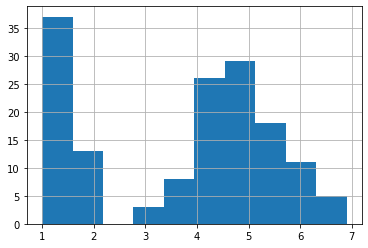

In [89]:
iris['petal_len'].hist();

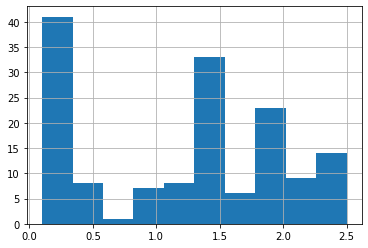

In [90]:
iris['petal_wd'].hist();

In [91]:
"""
the distribution has a beautiful symmetric bell shape.
However, the length of petals is not normal. 
Its plot shows two modes, one peak happening near 0 and the other around 5. 
Less patterns were observed for the petal width.
"""

'\nthe distribution has a beautiful symmetric bell shape.\nHowever, the length of petals is not normal. \nIts plot shows two modes, one peak happening near 0 and the other around 5. \nLess patterns were observed for the petal width.\n'

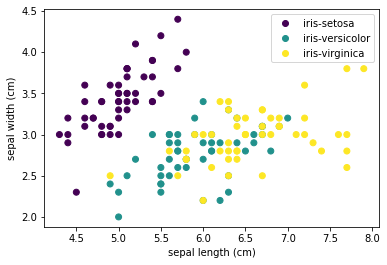

In [92]:
"""
To see the interactions between attributes we use scatter plots

However, it's difficult to see if there's any grouping without any indication of the true species of the flower that a datapoint represents. 
Therefore, we define a color code for each species to differentiate species visually:
"""

# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0,
'iris-versicolor': 1,
'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

# scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

## add legend
plt.legend(handles=scatter.legend_elements()[0],labels = inv_name_dict.keys())
plt.show()

In [93]:
"""
Using sepal_length and sepal_width features, 
we can distinguish iris-setosa from others; 
separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.
"""

'\nUsing sepal_length and sepal_width features, \nwe can distinguish iris-setosa from others; \nseparating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.\n'

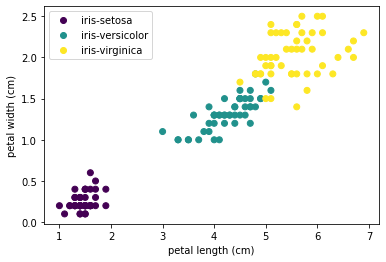

In [94]:
# scatter plot
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# add legend
plt.legend(handles= scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

In [95]:
"""
Interestingly, the length and width of the petal are highly correlated, 
and these two features are very useful to identify various iris species. 
It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, 
indicating the difficulties for some classifiers. 
It is worth keeping in mind when training to decide which features we should use.
"""

'\nInterestingly, the length and width of the petal are highly correlated, \nand these two features are very useful to identify various iris species. \nIt is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, \nindicating the difficulties for some classifiers. \nIt is worth keeping in mind when training to decide which features we should use.\n'

In [96]:
"""
To see scatter plots of all pairs of features, 
use pandas.plotting.scatter_matrix(). 
Besides the histograms of individual variables along the diagonal, 
it will show the scatter plots of all pairs of attributes to help spot structured relationships between features.
"""

'\nTo see scatter plots of all pairs of features, \nuse pandas.plotting.scatter_matrix(). \nBesides the histograms of individual variables along the diagonal, \nit will show the scatter plots of all pairs of attributes to help spot structured relationships between features.\n'

In [97]:
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


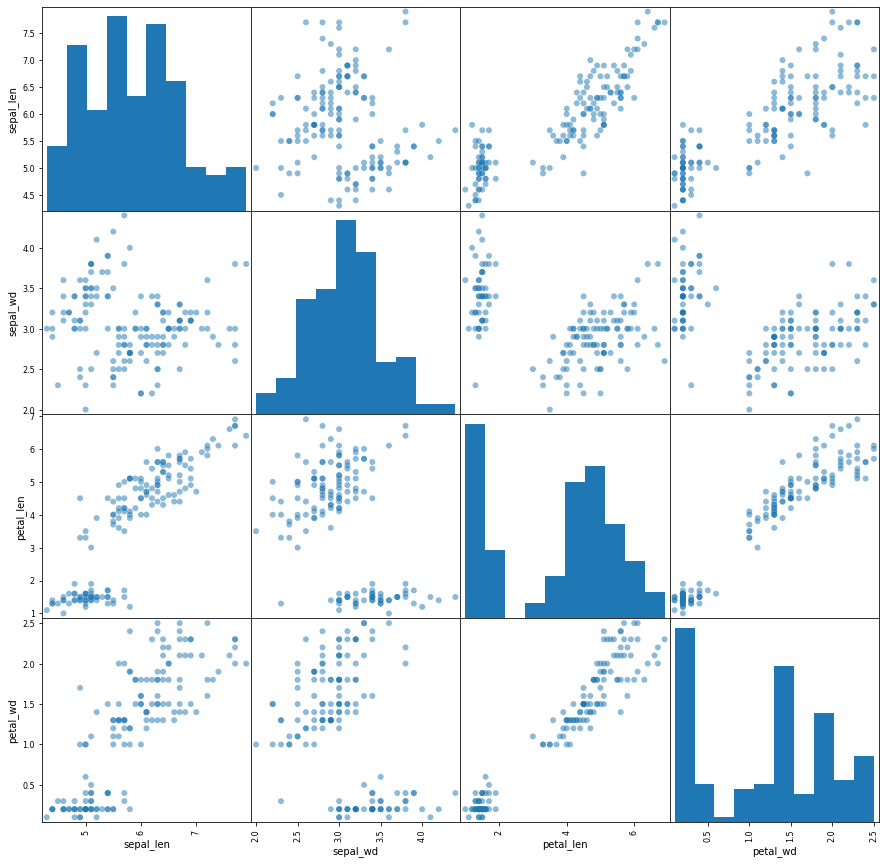

In [98]:
# Define a colormap with distinct colors
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Extract the features and target variable
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# Create scatter matrix
pd.plotting.scatter_matrix(X, marker='o',figsize=(15, 15))

# Display the plot
plt.show()
#TODO I did not know to solve the issue of the colors of non-diagonal plots

In [99]:
"""
K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter.
A hyperparameter in machine learning is a parameter whose value is set before the learning process begins. 
We will learn how to tune the hyperparameter later.
"""

from sklearn.neighbors import KNeighborsClassifier

"""
*** K nearest neighbors can also be used for regression problems. The difference lies in prediction. 
Instead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.
"""

'\n*** K nearest neighbors can also be used for regression problems. The difference lies in prediction. \nInstead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.\n'